In [ ]:
#%reset

###Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###2 emiten

####Ellipsoidal Uncertainty

In [ ]:
import os
base_dir = '/content/drive/My Drive/PYTHON/saham/data2'

data2 = [f for f in os.listdir(base_dir)]
for f in data2:
    print(f)

BBRI.JK.csv
PGAS.JK.csv


In [ ]:
#show one emiten
import pandas as pd

example_emiten2 = data2[0]
df_example2 = pd.read_csv(base_dir+'/'+example_emiten2)
print(example_emiten2)
print(df_example2.info())
print("Showing Head of Emiten Dataframe")
df_example2.head()

BBRI.JK.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB
None
Showing Head of Emiten Dataframe


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,780.0,795.0,755.0,765.0,237.514099,450460000
1,2010-01-08,770.0,795.0,755.0,785.0,243.723633,609235000
2,2010-01-15,780.0,830.0,780.0,790.0,245.275955,877595000
3,2010-01-22,790.0,790.0,750.0,765.0,237.514099,645765000
4,2010-01-29,765.0,770.0,740.0,740.0,229.752167,766440000


In [ ]:
#prepare main dataframe

df2=pd.DataFrame()
target_column2 = 'Close'
emitens2 = []
for f in data2:
  emiten = f.lower().replace('.jk.csv', '')
  emitens2.append(emiten)
  df_emiten = pd.read_csv(base_dir+'/'+f)
  df2['Date'] = df_emiten['Date']
  df2[emiten] = df_emiten[target_column2]
df2=df2.dropna()

#showing head of dataframe
df2.head()

,Date,bbri,pgas
0,2010-01-01,765.0,4000.0
1,2010-01-08,785.0,3850.0
2,2010-01-15,790.0,3750.0
3,2010-01-22,765.0,3800.0
4,2010-01-29,740.0,3700.0


In [ ]:
#splitting train and test data
df_train2 = df2[(df2['Date'] <= '2017-01-01')]
df_test2 = df2[(df2['Date'] > '2017-01-01')]

In [ ]:
df_train2

,Date,bbri,pgas
0,2010-01-01,765.0,4000.0
1,2010-01-08,785.0,3850.0
2,2010-01-15,790.0,3750.0
3,2010-01-22,765.0,3800.0
4,2010-01-29,740.0,3700.0
...,...,...,...
361,2016-12-02,2300.0,2840.0
362,2016-12-09,2280.0,2800.0
363,2016-12-16,2175.0,2480.0
364,2016-12-23,2330.0,2760.0


In [ ]:
df_test2


,Date,bbri,pgas
366,2017-01-06,2375.0,2730.0
367,2017-01-13,2400.0,2720.0
368,2017-01-20,2350.0,2730.0
369,2017-01-27,2395.0,2870.0
370,2017-02-03,2395.0,2810.0
...,...,...,...
518,2019-12-06,4250.0,2110.0
519,2019-12-13,4350.0,2160.0
520,2019-12-20,4410.0,2190.0
521,2019-12-27,4410.0,2140.0


In [ ]:
emiten_means2 = df2.mean()
emiten_means2

bbri    2210.248566
pgas    3530.869981
dtype: float64

In [ ]:
#prepare dataframe percentage return 

df_pct_ret2 = df_train2.drop(columns=['Date']).pct_change()
df_pct_ret2=df_pct_ret2.dropna()
df_pct_ret2.head()

,bbri,pgas
1,0.026144,-0.037500
2,0.006369,-0.025974
3,-0.031646,0.013333
4,-0.032680,-0.026316
5,-0.013514,-0.020270


In [ ]:
import numpy as np
R2=np.array(df_pct_ret2)
print(R2.shape)

(365, 2)


In [ ]:
emiten_pct_ret_means2 = df_pct_ret2.mean()
emiten_pct_ret_means2

bbri    0.004238
pgas    0.000255
dtype: float64

In [ ]:
myu2 = np.matrix(emiten_pct_ret_means2.values).T
myu2



matrix([[0.00423764],
        [0.00025489]])

In [ ]:
#set nilai tho dan rho
tho = 0.01
rho = 0.0002;
print(rho)

0.0002


In [ ]:
#jumlah data
n=R2.shape[0]
n

365

In [ ]:
import cvxpy as cp
import numpy as np
import math as mt

# Generate a random feasible SOCP.
P = np.array([[0.0001], [0.00009]]).T

ns = R2.shape[1]
m12 = np.ones((n,1), dtype=np.int64)
m12 = np.matrix(m12).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      cp.SOC(w.T @ myu2 - rho, P * w), #first constrraint, SOC constraint
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m12.T, (n,)) - R2*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
#print("SOC constraint dual variable solution")
#print(contraints[0].dual_value)

The optimal value is 0.5633056848003961
Solution for w is
[0.5338137 0.4661863]


In [ ]:
#first constraint manual validation
print(rho) #rho
print(w.value.T@myu2 - np.linalg.norm(P*w.value)) 
print(w.value.T@myu2 - np.linalg.norm(P*w.value)>= rho) #value of first constraint
(P*w.value)
print(cp.sum(cp.abs(w.value).value))

0.0002
[[0.00231304]]
[[ True]]
Sum([0.5338137 0.4661863], None, False)


In [ ]:
df_pct_ret_test2=df_test2.drop(columns=['Date']).pct_change()
df_pct_ret_test2=df_pct_ret_test2.dropna()
df_pct_ret_test2

,bbri,pgas
367,0.010526,-0.003663
368,-0.020833,0.003676
369,0.019149,0.051282
370,0.000000,-0.020906
371,0.002088,0.007117
...,...,...
518,0.007109,-0.040909
519,0.023529,0.023697
520,0.013793,0.013889
521,0.000000,-0.022831


In [ ]:
emitens2

['bbri', 'pgas']

In [ ]:
df_pct_weekly_return2 = pd.DataFrame()
i=0
for emiten in emitens2:
  df_pct_weekly_return2[emiten]=w.value[i]*df_pct_ret_test2[emiten]
  i+=1

df_pct_weekly_return2

,bbri,pgas
367,0.005619,-0.001708
368,-0.011121,0.001714
369,0.010222,0.023907
370,0.000000,-0.009746
371,0.001114,0.003318
...,...,...
518,0.003795,-0.019071
519,0.012560,0.011047
520,0.007363,0.006475
521,0.000000,-0.010644


In [ ]:
price_data2 = df_test2.drop(columns=['Date'])
price_data2

,bbri,pgas
366,2375.0,2730.0
367,2400.0,2720.0
368,2350.0,2730.0
369,2395.0,2870.0
370,2395.0,2810.0
...,...,...
518,4250.0,2110.0
519,4350.0,2160.0
520,4410.0,2190.0
521,4410.0,2140.0


In [ ]:
ret_data2 = price_data2.pct_change()[1:]
ret_data2

,bbri,pgas
367,0.010526,-0.003663
368,-0.020833,0.003676
369,0.019149,0.051282
370,0.000000,-0.020906
371,0.002088,0.007117
...,...,...
518,0.007109,-0.040909
519,0.023529,0.023697
520,0.013793,0.013889
521,0.000000,-0.022831


In [ ]:
weighted_returns2 = (w.value.reshape(2) * ret_data2)
weighted_returns2

,bbri,pgas
367,0.005619,-0.001708
368,-0.011121,0.001714
369,0.010222,0.023907
370,0.000000,-0.009746
371,0.001114,0.003318
...,...,...
518,0.003795,-0.019071
519,0.012560,0.011047
520,0.007363,0.006475
521,0.000000,-0.010644


In [ ]:
port_ret21 = weighted_returns2.sum(axis=1)
port_ret21

367    0.003911
368   -0.009407
369    0.034129
370   -0.009746
371    0.004432
         ...   
518   -0.015276
519    0.023607
520    0.013838
521   -0.010644
522    0.005567
Length: 156, dtype: float64

In [ ]:
port_ret21.to_csv('port_ret21.csv')
!cp port_ret21.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret21))
print('Min return:', min(port_ret21))
print('Average return:', np.mean(port_ret21))
print('sharpe ratio :', np.mean(port_ret21)/np.std(port_ret21))


print(np.mean(port_ret21) > rho)

Max return: 0.11747564031184005
Min return: -0.12183003368736164
Average return: 0.0025132713930340464
sharpe ratio : 0.06802633147802563
True


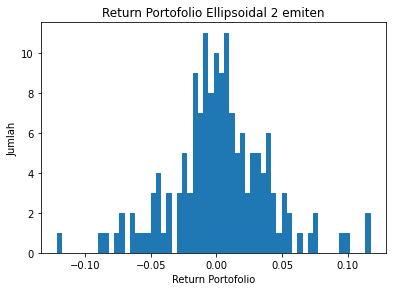

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret21, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio Ellipsoidal 2 emiten")
plt.show(); 


#### Sparse Mean Variance

In [ ]:
ns = R2.shape[1]
m12 = np.ones((n,1), dtype=np.int64)
m12 = np.matrix(m12).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      w.T*myu2 == rho, 
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m12.T, (n,)) - R2*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
print("SOC constraint dual variable solution")
print(contraints[0].dual_value)

The optimal value is 0.8852362424239388
Solution for w is
[-0.0137808  1.0137808]
SOC constraint dual variable solution
[299.99117558]


In [ ]:
df_pct_ret_test2=df_test2.drop(columns=['Date']).pct_change()
df_pct_ret_test2=df_pct_ret_test2.dropna()
df_pct_ret_test2

,bbri,pgas
367,0.010526,-0.003663
368,-0.020833,0.003676
369,0.019149,0.051282
370,0.000000,-0.020906
371,0.002088,0.007117
...,...,...
518,0.007109,-0.040909
519,0.023529,0.023697
520,0.013793,0.013889
521,0.000000,-0.022831


In [ ]:
emitens2

['bbri', 'pgas']

In [ ]:
df_pct_weekly_return2 = pd.DataFrame()
i=0
for emiten in emitens2:
  df_pct_weekly_return2[emiten]=w.value[i]*df_pct_ret_test2[emiten]
  i+=1

df_pct_weekly_return2

,bbri,pgas
367,-0.000145,-0.003713
368,0.000287,0.003727
369,-0.000264,0.051989
370,-0.000000,-0.021194
371,-0.000029,0.007216
...,...,...
518,-0.000098,-0.041473
519,-0.000324,0.024023
520,-0.000190,0.014080
521,-0.000000,-0.023146


In [ ]:
price_data2 = df_test2.drop(columns=['Date'])
price_data2

,bbri,pgas
366,2375.0,2730.0
367,2400.0,2720.0
368,2350.0,2730.0
369,2395.0,2870.0
370,2395.0,2810.0
...,...,...
518,4250.0,2110.0
519,4350.0,2160.0
520,4410.0,2190.0
521,4410.0,2140.0


In [ ]:
ret_data2 = price_data2.pct_change()[1:]
ret_data2

,bbri,pgas
367,0.010526,-0.003663
368,-0.020833,0.003676
369,0.019149,0.051282
370,0.000000,-0.020906
371,0.002088,0.007117
...,...,...
518,0.007109,-0.040909
519,0.023529,0.023697
520,0.013793,0.013889
521,0.000000,-0.022831


In [ ]:
weighted_returns2 = (w.value.reshape(2) * ret_data2)
weighted_returns2

,bbri,pgas
367,-0.000145,-0.003713
368,0.000287,0.003727
369,-0.000264,0.051989
370,-0.000000,-0.021194
371,-0.000029,0.007216
...,...,...
518,-0.000098,-0.041473
519,-0.000324,0.024023
520,-0.000190,0.014080
521,-0.000000,-0.023146


In [ ]:
port_ret22 = weighted_returns2.sum(axis=1)
port_ret22

367   -0.003859
368    0.004014
369    0.051725
370   -0.021194
371    0.007187
         ...   
518   -0.041571
519    0.023699
520    0.013890
521   -0.023146
522    0.009443
Length: 156, dtype: float64

In [ ]:
port_ret22.to_csv('port_ret22.csv')
!cp port_ret22.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret22))
print('Min return:', min(port_ret22))
print('Average return:', np.mean(port_ret22))
print('sharpe ratio :', np.mean(port_ret22)/np.std(port_ret22))


Max return: 0.22497319200997784
Min return: -0.16512340551368135
Average return: 0.0001109918534505319
sharpe ratio : 0.0018843109711669677


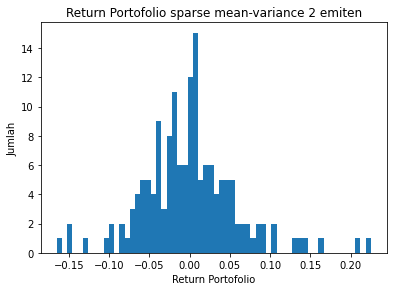

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret22, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio sparse mean-variance 2 emiten")
plt.show(); 

###3 emiten

#### ellipsoidal uncertainty

In [ ]:
import os
base_dir = '/content/drive/My Drive/PYTHON/saham/data3'

data3 = [f for f in os.listdir(base_dir)]
for f in data3:
    print(f)

ASII.JK.csv
BBRI.JK.csv
PGAS.JK.csv


In [ ]:
#show one emiten
import pandas as pd

example_emiten3 = data3[0]
df_example3 = pd.read_csv(base_dir+'/'+example_emiten3)
print(example_emiten3)
print(df_example3.info())
print("Showing Head of Emiten Dataframe")
df_example3.head()

ASII.JK.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB
None
Showing Head of Emiten Dataframe


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,3530.0,3580.0,3415.0,3420.0,1195.503296,160
1,2010-01-08,3440.0,3580.0,3380.0,3555.0,1242.694092,200
2,2010-01-15,3620.0,3650.0,3520.0,3525.0,1232.207153,17475160
3,2010-01-22,3380.0,3600.0,3320.0,3600.0,1258.424194,39415160
4,2010-01-29,3595.0,3630.0,3485.0,3535.0,1235.702759,32005160


In [ ]:
df3=pd.DataFrame()
target_column3 = 'Close'
emitens3 = []
for f in data3:
  emiten = f.lower().replace('.jk.csv', '')
  emitens3.append(emiten)
  df_emiten3 = pd.read_csv(base_dir+'/'+f)
  df3['Date'] = df_emiten3['Date']
  df3[emiten] = df_emiten3[target_column3]
df3=df3.dropna()

In [ ]:
df_train3 = df3[(df3['Date'] <= '2017-01-01')]
df_test3 = df3[(df3['Date'] > '2017-01-01')]

In [ ]:
df_train3

,Date,asii,bbri,pgas
0,2010-01-01,3420.0,765.0,4000.0
1,2010-01-08,3555.0,785.0,3850.0
2,2010-01-15,3525.0,790.0,3750.0
3,2010-01-22,3600.0,765.0,3800.0
4,2010-01-29,3535.0,740.0,3700.0
...,...,...,...,...
361,2016-12-02,7800.0,2300.0,2840.0
362,2016-12-09,7750.0,2280.0,2800.0
363,2016-12-16,7525.0,2175.0,2480.0
364,2016-12-23,8125.0,2330.0,2760.0


In [ ]:
df_test3

,Date,asii,bbri,pgas
366,2017-01-06,7925.0,2375.0,2730.0
367,2017-01-13,8150.0,2400.0,2720.0
368,2017-01-20,8075.0,2350.0,2730.0
369,2017-01-27,8100.0,2395.0,2870.0
370,2017-02-03,8075.0,2395.0,2810.0
...,...,...,...,...
518,2019-12-06,6550.0,4250.0,2110.0
519,2019-12-13,6850.0,4350.0,2160.0
520,2019-12-20,6875.0,4410.0,2190.0
521,2019-12-27,6875.0,4410.0,2140.0


In [ ]:
emiten_means3 = df3.mean()
emiten_means3

asii    6963.231358
bbri    2210.248566
pgas    3530.869981
dtype: float64

In [ ]:
df_pct_ret3 = df_train3.drop(columns=['Date']).pct_change()
df_pct_ret3=df_pct_ret3.dropna()
df_pct_ret3.head()

,asii,bbri,pgas
1,0.039474,0.026144,-0.037500
2,-0.008439,0.006369,-0.025974
3,0.021277,-0.031646,0.013333
4,-0.018056,-0.032680,-0.026316
5,-0.029703,-0.013514,-0.020270


In [ ]:
import numpy as np
R3=np.array(df_pct_ret3)
print(R3.shape)

(365, 3)


In [ ]:
emiten_pct_ret_means3 = df_pct_ret3.mean()
emiten_pct_ret_means3

asii    0.003320
bbri    0.004238
pgas    0.000255
dtype: float64

In [ ]:
myu3 = np.matrix(emiten_pct_ret_means3.values).T
myu3

matrix([[0.00331959],
        [0.00423764],
        [0.00025489]])

In [ ]:
tho = 0.01
rho= 0.0002;
print(rho)

0.0002


In [ ]:
#jumlah data
n=R3.shape[0]
n

365

In [ ]:
import cvxpy as cp
import numpy as np

# Generate a random feasible SOCP.
P = np.array([[0.0001], [0.00009], [0.00008]]).T

ns = R3.shape[1]
m13 = np.ones((n,1), dtype=np.int64)
m13 = np.matrix(m13).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      cp.SOC(w.T @ myu3 - rho, P * w), #first constrraint, SOC constraint
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m13.T, (n,)) - R3*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
#print("SOC constraint dual variable solution")
#print(contraints[0].dual_value)

The optimal value is 0.49221182982685285
Solution for w is
[0.37890204 0.27230602 0.34879193]


In [ ]:
#first constraint manual validation
print(rho) #rho
print(w.value.T@myu3 - np.linalg.norm(P*w.value)) 
print(w.value.T@myu3 - np.linalg.norm(P*w.value)>= rho) #value of first constraint
(P*w.value)

0.0002
[[0.00244758]]
[[ True]]


array([[3.78902043e-05, 2.45075422e-05, 2.79033547e-05]])

In [ ]:
df_pct_ret_test3=df_test3.drop(columns=['Date']).pct_change()
df_pct_ret_test3=df_pct_ret_test3.dropna()
df_pct_ret_test3

,asii,bbri,pgas
367,0.028391,0.010526,-0.003663
368,-0.009202,-0.020833,0.003676
369,0.003096,0.019149,0.051282
370,-0.003086,0.000000,-0.020906
371,0.003096,0.002088,0.007117
...,...,...,...
518,-0.022388,0.007109,-0.040909
519,0.045802,0.023529,0.023697
520,0.003650,0.013793,0.013889
521,0.000000,0.000000,-0.022831


In [ ]:
emitens3

['asii', 'bbri', 'pgas']

In [ ]:
df_pct_weekly_return3 = pd.DataFrame()
i=0
for emiten in emitens3:
  df_pct_weekly_return3[emiten]=w.value[i]*df_pct_ret_test3[emiten]
  i+=1

df_pct_weekly_return3

,asii,bbri,pgas
367,0.010757,0.002866,-0.001278
368,-0.003487,-0.005673,0.001282
369,0.001173,0.005214,0.017887
370,-0.001169,0.000000,-0.007292
371,0.001173,0.000568,0.002483
...,...,...,...
518,-0.008483,0.001936,-0.014269
519,0.017354,0.006407,0.008265
520,0.001383,0.003756,0.004844
521,0.000000,0.000000,-0.007963


In [ ]:
price_data3 = df_test3.drop(columns=['Date'])
price_data3

,asii,bbri,pgas
366,7925.0,2375.0,2730.0
367,8150.0,2400.0,2720.0
368,8075.0,2350.0,2730.0
369,8100.0,2395.0,2870.0
370,8075.0,2395.0,2810.0
...,...,...,...
518,6550.0,4250.0,2110.0
519,6850.0,4350.0,2160.0
520,6875.0,4410.0,2190.0
521,6875.0,4410.0,2140.0


In [ ]:
ret_data3 = price_data3.pct_change()[1:]
ret_data3

,asii,bbri,pgas
367,0.028391,0.010526,-0.003663
368,-0.009202,-0.020833,0.003676
369,0.003096,0.019149,0.051282
370,-0.003086,0.000000,-0.020906
371,0.003096,0.002088,0.007117
...,...,...,...
518,-0.022388,0.007109,-0.040909
519,0.045802,0.023529,0.023697
520,0.003650,0.013793,0.013889
521,0.000000,0.000000,-0.022831


In [ ]:
weighted_returns3 = (w.value.reshape(3) * ret_data3)
weighted_returns3

,asii,bbri,pgas
367,0.010757,0.002866,-0.001278
368,-0.003487,-0.005673,0.001282
369,0.001173,0.005214,0.017887
370,-0.001169,0.000000,-0.007292
371,0.001173,0.000568,0.002483
...,...,...,...
518,-0.008483,0.001936,-0.014269
519,0.017354,0.006407,0.008265
520,0.001383,0.003756,0.004844
521,0.000000,0.000000,-0.007963


In [ ]:
port_ret31 = weighted_returns3.sum(axis=1)
port_ret31

367    0.012346
368   -0.007878
369    0.024274
370   -0.008461
371    0.004224
         ...   
518   -0.020816
519    0.032027
520    0.009983
521   -0.007963
522    0.008011
Length: 156, dtype: float64

In [ ]:
port_ret31.to_csv('port_ret31.csv')
!cp port_ret31.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret31))
print('Min return:', min(port_ret31))
print('Average return:', np.mean(port_ret31))
print('sharpe ratio :', np.mean(port_ret31)/np.std(port_ret31))


print(np.mean(port_ret31) > rho) 

Max return: 0.10202881398290914
Min return: -0.08135670623722727
Average return: 0.001191438370719998
sharpe ratio : 0.03598112341040192
True


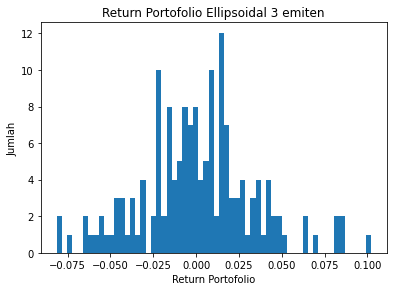

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret31, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio Ellipsoidal 3 emiten")
plt.show(); 

####Sparse Mean-Variance

In [ ]:
ns = R3.shape[1]
m13 = np.ones((n,1), dtype=np.int64)
m13= np.matrix(m13).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      w.T*myu3 == rho, 
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m13.T, (n,)) - R3*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
print("SOC constraint dual variable solution")
print(contraints[0].dual_value)

The optimal value is 0.8498134857303001
Solution for w is
[ 0.26565115 -0.21819761  0.95254646]
SOC constraint dual variable solution
[311.34190748]


In [ ]:
#return portofolio
df_pct_ret_test3=df_test3.drop(columns=['Date']).pct_change()
df_pct_ret_test3=df_pct_ret_test3.dropna()
df_pct_ret_test3

,asii,bbri,pgas
367,0.028391,0.010526,-0.003663
368,-0.009202,-0.020833,0.003676
369,0.003096,0.019149,0.051282
370,-0.003086,0.000000,-0.020906
371,0.003096,0.002088,0.007117
...,...,...,...
518,-0.022388,0.007109,-0.040909
519,0.045802,0.023529,0.023697
520,0.003650,0.013793,0.013889
521,0.000000,0.000000,-0.022831


In [ ]:
emitens3

['asii', 'bbri', 'pgas']

In [ ]:
df_pct_weekly_return3 = pd.DataFrame()
i=0
for emiten in emitens3:
  df_pct_weekly_return3[emiten]=w.value[i]*df_pct_ret_test3[emiten]
  i+=1

df_pct_weekly_return3

,asii,bbri,pgas
367,0.007542,-0.002297,-0.003489
368,-0.002445,0.004546,0.003502
369,0.000822,-0.004178,0.048849
370,-0.000820,-0.000000,-0.019914
371,0.000822,-0.000456,0.006780
...,...,...,...
518,-0.005947,-0.001551,-0.038968
519,0.012167,-0.005134,0.022572
520,0.000970,-0.003010,0.013230
521,0.000000,-0.000000,-0.021748


In [ ]:
price_data3 = df_test3.drop(columns=['Date'])
price_data3

,asii,bbri,pgas
366,7925.0,2375.0,2730.0
367,8150.0,2400.0,2720.0
368,8075.0,2350.0,2730.0
369,8100.0,2395.0,2870.0
370,8075.0,2395.0,2810.0
...,...,...,...
518,6550.0,4250.0,2110.0
519,6850.0,4350.0,2160.0
520,6875.0,4410.0,2190.0
521,6875.0,4410.0,2140.0


In [ ]:
ret_data3 = price_data3.pct_change()[1:]
ret_data3

,asii,bbri,pgas
367,0.028391,0.010526,-0.003663
368,-0.009202,-0.020833,0.003676
369,0.003096,0.019149,0.051282
370,-0.003086,0.000000,-0.020906
371,0.003096,0.002088,0.007117
...,...,...,...
518,-0.022388,0.007109,-0.040909
519,0.045802,0.023529,0.023697
520,0.003650,0.013793,0.013889
521,0.000000,0.000000,-0.022831


In [ ]:
weighted_returns3 = (w.value.reshape(3) * ret_data3)
weighted_returns3

,asii,bbri,pgas
367,0.007542,-0.002297,-0.003489
368,-0.002445,0.004546,0.003502
369,0.000822,-0.004178,0.048849
370,-0.000820,-0.000000,-0.019914
371,0.000822,-0.000456,0.006780
...,...,...,...
518,-0.005947,-0.001551,-0.038968
519,0.012167,-0.005134,0.022572
520,0.000970,-0.003010,0.013230
521,0.000000,-0.000000,-0.021748


In [ ]:
port_ret32 = weighted_returns3.sum(axis=1)
port_ret32

367    0.001756
368    0.005603
369    0.045493
370   -0.020734
371    0.007147
         ...   
518   -0.046466
519    0.029605
520    0.011190
521   -0.021748
522    0.011306
Length: 156, dtype: float64

In [ ]:
port_ret32.to_csv('port_ret32.csv')
!cp port_ret32.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret32))
print('Min return:', min(port_ret32))
print('Average return:', np.mean(port_ret32))
print('sharpe ratio :', np.mean(port_ret32)/np.std(port_ret32))

Max return: 0.20835597772594874
Min return: -0.16918314122020217
Average return: -0.000908196602947245
sharpe ratio : -0.01590032467445969


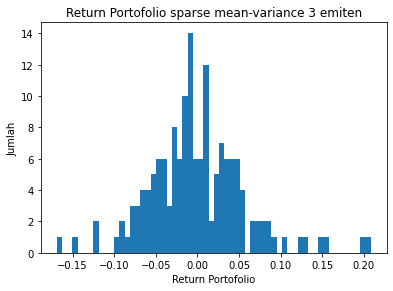

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret32, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio sparse mean-variance 3 emiten")
plt.show(); 

###4 emiten

####Ellipsoidal Uncertainty

In [ ]:
import os
base_dir = '/content/drive/My Drive/PYTHON/saham/data4'

data4 = [f for f in os.listdir(base_dir)]
for f in data4:
    print(f)

ASII.JK.csv
BBRI.JK.csv
CPIN.JK.csv
PGAS.JK.csv


In [ ]:
#show one emiten
import pandas as pd

example_emiten4 = data4[0]
df_example4 = pd.read_csv(base_dir+'/'+example_emiten4)
print(example_emiten4)
print(df_example4.info())
print("Showing Head of Emiten Dataframe")
df_example4.head()

ASII.JK.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB
None
Showing Head of Emiten Dataframe


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,3530.0,3580.0,3415.0,3420.0,1195.503296,160
1,2010-01-08,3440.0,3580.0,3380.0,3555.0,1242.694092,200
2,2010-01-15,3620.0,3650.0,3520.0,3525.0,1232.207153,17475160
3,2010-01-22,3380.0,3600.0,3320.0,3600.0,1258.424194,39415160
4,2010-01-29,3595.0,3630.0,3485.0,3535.0,1235.702759,32005160


In [ ]:
df4=pd.DataFrame()
target_column4 = 'Close'
emitens4 = []
for f in data4:
  emiten = f.lower().replace('.jk.csv', '')
  emitens4.append(emiten)
  df_emiten4 = pd.read_csv(base_dir+'/'+f)
  df4['Date'] = df_emiten4['Date']
  df4[emiten] = df_emiten4[target_column4]
df4=df4.dropna()

In [ ]:
df_train4 = df4[(df4['Date'] <= '2017-01-01')]
df_test4 = df4[(df4['Date'] > '2017-01-01')]

print(df_train4)
print(df_test4)

           Date    asii    bbri    cpin    pgas
0    2010-01-01  3420.0   765.0   450.0  4000.0
1    2010-01-08  3555.0   785.0   455.0  3850.0
2    2010-01-15  3525.0   790.0   455.0  3750.0
3    2010-01-22  3600.0   765.0   440.0  3800.0
4    2010-01-29  3535.0   740.0   440.0  3700.0
..          ...     ...     ...     ...     ...
361  2016-12-02  7800.0  2300.0  3150.0  2840.0
362  2016-12-09  7750.0  2280.0  3180.0  2800.0
363  2016-12-16  7525.0  2175.0  2900.0  2480.0
364  2016-12-23  8125.0  2330.0  3110.0  2760.0
365  2016-12-30  8125.0  2420.0  3260.0  2860.0

[366 rows x 5 columns]
           Date    asii    bbri    cpin    pgas
366  2017-01-06  7925.0  2375.0  3190.0  2730.0
367  2017-01-13  8150.0  2400.0  3230.0  2720.0
368  2017-01-20  8075.0  2350.0  3200.0  2730.0
369  2017-01-27  8100.0  2395.0  3220.0  2870.0
370  2017-02-03  8075.0  2395.0  3290.0  2810.0
..          ...     ...     ...     ...     ...
518  2019-12-06  6550.0  4250.0  6525.0  2110.0
519  2019-12-13 

In [ ]:
emiten_means4 = df4.mean()
emiten_means4

asii    6963.231358
bbri    2210.248566
cpin    3433.757170
pgas    3530.869981
dtype: float64

In [ ]:
df_pct_ret4 = df_train4.drop(columns=['Date']).pct_change()
df_pct_ret4=df_pct_ret4.dropna()
df_pct_ret4.head()

,asii,bbri,cpin,pgas
1,0.039474,0.026144,0.011111,-0.037500
2,-0.008439,0.006369,0.000000,-0.025974
3,0.021277,-0.031646,-0.032967,0.013333
4,-0.018056,-0.032680,0.000000,-0.026316
5,-0.029703,-0.013514,-0.045455,-0.020270


In [ ]:
import numpy as np
R4=np.array(df_pct_ret4)
print(R4.shape)

(365, 4)


In [ ]:
emiten_pct_ret_means4 = df_pct_ret4.mean()
emiten_pct_ret_means4

asii    0.003320
bbri    0.004238
cpin    0.007500
pgas    0.000255
dtype: float64

In [ ]:
myu4 = np.matrix(emiten_pct_ret_means4.values).T
myu4

matrix([[0.00331959],
        [0.00423764],
        [0.00749999],
        [0.00025489]])

In [ ]:
tho = 0.01
rho= 0.0002;
print(rho)

#jumlah data
n=R4.shape[0]
print(n)

0.0002
365


In [ ]:
import cvxpy as cp
import numpy as np

# Generate a random feasible SOCP.
P = np.array([[0.0001], [0.00009], [0.00008], [0.0001]]).T

ns = R4.shape[1]
m14 = np.ones((n,1), dtype=np.int64)
m14 = np.matrix(m14).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      cp.SOC(w.T @ myu4 - rho, P * w), #first constrraint, SOC constraint
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m14.T, (n,)) - R4*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
#print("SOC constraint dual variable solution")
#print(contraints[0].dual_value)

The optimal value is 0.4909523956066155
Solution for w is
[0.36784384 0.25775811 0.03321256 0.34118549]


In [ ]:
#first constraint manual validation
print(rho) #rho
print(w.value.T@myu4 - np.linalg.norm(P*w.value)) 
print(w.value.T@myu4 - np.linalg.norm(P*w.value)>= rho) #value of first constraint
(P*w.value)

0.0002
[[0.0025941]]
[[ True]]


array([[3.67843839e-05, 2.31982296e-05, 2.65700510e-06, 3.41185491e-05]])

In [ ]:
#mencari return dan drop kolom date
df_pct_ret_test4=df_test4.drop(columns=['Date']).pct_change()
df_pct_ret_test4=df_pct_ret_test4.dropna()
df_pct_ret_test4

,asii,bbri,cpin,pgas
367,0.028391,0.010526,0.012539,-0.003663
368,-0.009202,-0.020833,-0.009288,0.003676
369,0.003096,0.019149,0.006250,0.051282
370,-0.003086,0.000000,0.021739,-0.020906
371,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...
518,-0.022388,0.007109,-0.054348,-0.040909
519,0.045802,0.023529,0.034483,0.023697
520,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
emitens4

['asii', 'bbri', 'cpin', 'pgas']

In [ ]:
df_pct_weekly_return4 = pd.DataFrame()
i=0
for emiten in emitens4:
  df_pct_weekly_return4[emiten]=w.value[i]*df_pct_ret_test4[emiten]
  i+=1

df_pct_weekly_return4

,asii,bbri,cpin,pgas
367,0.010444,0.002713,0.000416,-0.001250
368,-0.003385,-0.005370,-0.000308,0.001254
369,0.001139,0.004936,0.000208,0.017497
370,-0.001135,0.000000,0.000722,-0.007133
371,0.001139,0.000538,0.002120,0.002428
...,...,...,...,...
518,-0.008235,0.001832,-0.001805,-0.013958
519,0.016848,0.006065,0.001145,0.008085
520,0.001342,0.003555,0.000861,0.004739
521,0.000000,0.000000,-0.001679,-0.007790


In [ ]:
price_data4 = df_test4.drop(columns=['Date'])
price_data4

,asii,bbri,cpin,pgas
366,7925.0,2375.0,3190.0,2730.0
367,8150.0,2400.0,3230.0,2720.0
368,8075.0,2350.0,3200.0,2730.0
369,8100.0,2395.0,3220.0,2870.0
370,8075.0,2395.0,3290.0,2810.0
...,...,...,...,...
518,6550.0,4250.0,6525.0,2110.0
519,6850.0,4350.0,6750.0,2160.0
520,6875.0,4410.0,6925.0,2190.0
521,6875.0,4410.0,6575.0,2140.0


In [ ]:
ret_data4 = price_data4.pct_change()[1:]
ret_data4

,asii,bbri,cpin,pgas
367,0.028391,0.010526,0.012539,-0.003663
368,-0.009202,-0.020833,-0.009288,0.003676
369,0.003096,0.019149,0.006250,0.051282
370,-0.003086,0.000000,0.021739,-0.020906
371,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...
518,-0.022388,0.007109,-0.054348,-0.040909
519,0.045802,0.023529,0.034483,0.023697
520,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
weighted_returns4 = (w.value.reshape(4) * ret_data4)
weighted_returns4

,asii,bbri,cpin,pgas
367,0.010444,0.002713,0.000416,-0.001250
368,-0.003385,-0.005370,-0.000308,0.001254
369,0.001139,0.004936,0.000208,0.017497
370,-0.001135,0.000000,0.000722,-0.007133
371,0.001139,0.000538,0.002120,0.002428
...,...,...,...,...
518,-0.008235,0.001832,-0.001805,-0.013958
519,0.016848,0.006065,0.001145,0.008085
520,0.001342,0.003555,0.000861,0.004739
521,0.000000,0.000000,-0.001679,-0.007790


In [ ]:
port_ret41 = weighted_returns4.sum(axis=1)
port_ret41

367    0.012323
368   -0.007809
369    0.023779
370   -0.007546
371    0.006225
         ...   
518   -0.022166
519    0.032143
520    0.010498
521   -0.009468
522    0.009428
Length: 156, dtype: float64

In [ ]:
port_ret41.to_csv('port_ret41.csv')
!cp port_ret41.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret41))
print('Min return:', min(port_ret41))
print('Average return:', np.mean(port_ret41))
print('sharpe ratio :', np.mean(port_ret41)/np.std(port_ret41))


print(np.mean(port_ret41) > rho)

Max return: 0.10063621222922031
Min return: -0.07799471053630114
Average return: 0.00135608923424102
sharpe ratio : 0.04106005155277486
True


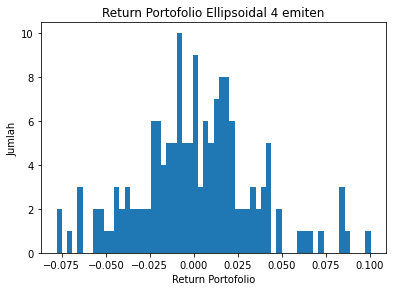

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret41, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio Ellipsoidal 4 emiten")
plt.show(); 

####sparse mean variance

In [ ]:
ns = R4.shape[1]
m14 = np.ones((n,1), dtype=np.int64)
m14 = np.matrix(m14).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      w.T*myu4 == rho, 
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m14.T, (n,)) - R4*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
print("SOC constraint dual variable solution")
print(contraints[0].dual_value)

The optimal value is 0.6803712108869872
Solution for w is
[ 0.41597477  0.1351637  -0.25783611  0.70669764]
SOC constraint dual variable solution
[152.82929924]


In [ ]:
df_pct_ret_test4=df_test4.drop(columns=['Date']).pct_change()
df_pct_ret_test4=df_pct_ret_test4.dropna()
df_pct_ret_test4

,asii,bbri,cpin,pgas
367,0.028391,0.010526,0.012539,-0.003663
368,-0.009202,-0.020833,-0.009288,0.003676
369,0.003096,0.019149,0.006250,0.051282
370,-0.003086,0.000000,0.021739,-0.020906
371,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...
518,-0.022388,0.007109,-0.054348,-0.040909
519,0.045802,0.023529,0.034483,0.023697
520,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
emitens4

['asii', 'bbri', 'cpin', 'pgas']

In [ ]:
df_pct_weekly_return4 = pd.DataFrame()
i=0
for emiten in emitens4:
  df_pct_weekly_return4[emiten]=w.value[i]*df_pct_ret_test4[emiten]
  i+=1

df_pct_weekly_return4

,asii,bbri,cpin,pgas
367,0.011810,0.001423,-0.003233,-0.002589
368,-0.003828,-0.002816,0.002395,0.002598
369,0.001288,0.002588,-0.001611,0.036241
370,-0.001284,0.000000,-0.005605,-0.014774
371,0.001288,0.000282,-0.016458,0.005030
...,...,...,...,...
518,-0.009313,0.000961,0.014013,-0.028910
519,0.019052,0.003180,-0.008891,0.016746
520,0.001518,0.001864,-0.006685,0.009815
521,0.000000,0.000000,0.013031,-0.016135


In [ ]:
price_data4 = df_test4.drop(columns=['Date'])
price_data4

,asii,bbri,cpin,pgas
366,7925.0,2375.0,3190.0,2730.0
367,8150.0,2400.0,3230.0,2720.0
368,8075.0,2350.0,3200.0,2730.0
369,8100.0,2395.0,3220.0,2870.0
370,8075.0,2395.0,3290.0,2810.0
...,...,...,...,...
518,6550.0,4250.0,6525.0,2110.0
519,6850.0,4350.0,6750.0,2160.0
520,6875.0,4410.0,6925.0,2190.0
521,6875.0,4410.0,6575.0,2140.0


In [ ]:
ret_data4 = price_data4.pct_change()[1:]
ret_data4

,asii,bbri,cpin,pgas
367,0.028391,0.010526,0.012539,-0.003663
368,-0.009202,-0.020833,-0.009288,0.003676
369,0.003096,0.019149,0.006250,0.051282
370,-0.003086,0.000000,0.021739,-0.020906
371,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...
518,-0.022388,0.007109,-0.054348,-0.040909
519,0.045802,0.023529,0.034483,0.023697
520,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
weighted_returns4 = (w.value.reshape(4) * ret_data4)
weighted_returns4

,asii,bbri,cpin,pgas
367,0.011810,0.001423,-0.003233,-0.002589
368,-0.003828,-0.002816,0.002395,0.002598
369,0.001288,0.002588,-0.001611,0.036241
370,-0.001284,0.000000,-0.005605,-0.014774
371,0.001288,0.000282,-0.016458,0.005030
...,...,...,...,...
518,-0.009313,0.000961,0.014013,-0.028910
519,0.019052,0.003180,-0.008891,0.016746
520,0.001518,0.001864,-0.006685,0.009815
521,0.000000,0.000000,0.013031,-0.016135


In [ ]:
port_ret42 = weighted_returns4.sum(axis=1)
port_ret42

367    0.007411
368   -0.001651
369    0.038506
370   -0.021663
371   -0.009858
         ...   
518   -0.023250
519    0.030088
520    0.006513
521   -0.003103
522   -0.001296
Length: 156, dtype: float64

In [ ]:
port_ret42.to_csv('port_ret42.csv')
!cp port_ret42.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret42))
print('Min return:', min(port_ret42))
print('Average return:', np.mean(port_ret42))
print('sharpe ratio :', np.mean(port_ret42)/np.std(port_ret42))

Max return: 0.16110941232856546
Min return: -0.12752294113599086
Average return: -0.0011614011384791826
sharpe ratio : -0.02505896432597636


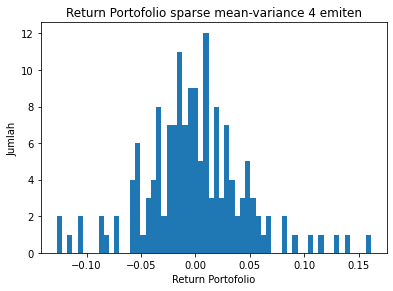

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret42, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio sparse mean-variance 4 emiten")
plt.show(); 

###5 emiten

####Ellipsoidal Uncertainty

In [ ]:
import os
base_dir = '/content/drive/My Drive/PYTHON/saham/data5'

data5 = [f for f in os.listdir(base_dir)]
for f in data5:
    print(f)

ANTM.JK.csv
ASII.JK.csv
BBRI.JK.csv
CPIN.JK.csv
PGAS.JK.csv


In [ ]:
#show one emiten
import pandas as pd

example_emiten5 = data5[0]
df_example5 = pd.read_csv(base_dir+'/'+example_emiten5)
print(example_emiten5)
print(df_example5.info())
print("Showing Head of Emiten Dataframe")
df_example5.head()

ANTM.JK.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB
None
Showing Head of Emiten Dataframe


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,1931.949951,1994.949951,1847.949951,1973.949951,1597.762817,163202117
1,2010-01-08,1973.949951,2015.939941,1910.949951,1931.949951,1563.767090,115584733
2,2010-01-15,1868.949951,1952.949951,1784.949951,1826.949951,1478.777588,215405936
3,2010-01-22,1826.949951,1847.949951,1742.949951,1805.949951,1461.779663,147717166
4,2010-01-29,1784.949951,1784.949951,1700.949951,1721.949951,1393.787964,127631493


In [ ]:
df5=pd.DataFrame()
target_column5 = 'Close'
emitens5 = []
for f in data5:
  emiten = f.lower().replace('.jk.csv', '')
  emitens5.append(emiten)
  df_emiten5 = pd.read_csv(base_dir+'/'+f)
  df5['Date'] = df_emiten5['Date']
  df5[emiten] = df_emiten5[target_column5]
df5=df5.dropna()

In [ ]:
df_train5 = df5[(df5['Date'] <= '2017-01-01')]
df_test5 = df5[(df5['Date'] > '2017-01-01')]

print(df_train5)
print(df_test5)

           Date         antm    asii    bbri    cpin    pgas
0    2010-01-01  1973.949951  3420.0   765.0   450.0  4000.0
1    2010-01-08  1931.949951  3555.0   785.0   455.0  3850.0
2    2010-01-15  1826.949951  3525.0   790.0   455.0  3750.0
3    2010-01-22  1805.949951  3600.0   765.0   440.0  3800.0
4    2010-01-29  1721.949951  3535.0   740.0   440.0  3700.0
..          ...          ...     ...     ...     ...     ...
361  2016-12-02   950.000000  7800.0  2300.0  3150.0  2840.0
362  2016-12-09   895.000000  7750.0  2280.0  3180.0  2800.0
363  2016-12-16   860.000000  7525.0  2175.0  2900.0  2480.0
364  2016-12-23   895.000000  8125.0  2330.0  3110.0  2760.0
365  2016-12-30   870.000000  8125.0  2420.0  3260.0  2860.0

[366 rows x 6 columns]
           Date   antm    asii    bbri    cpin    pgas
366  2017-01-06  865.0  7925.0  2375.0  3190.0  2730.0
367  2017-01-13  900.0  8150.0  2400.0  3230.0  2720.0
368  2017-01-20  810.0  8075.0  2350.0  3200.0  2730.0
369  2017-01-27  840.0  

In [ ]:
emiten_means5 = df5.mean()
emiten_means5

antm    1049.928070
asii    6963.231358
bbri    2210.248566
cpin    3433.757170
pgas    3530.869981
dtype: float64

In [ ]:
df_pct_ret5 = df_train5.drop(columns=['Date']).pct_change()
df_pct_ret5 =df_pct_ret5.dropna()
df_pct_ret5.head()

,antm,asii,bbri,cpin,pgas
1,-0.021277,0.039474,0.026144,0.011111,-0.037500
2,-0.054349,-0.008439,0.006369,0.000000,-0.025974
3,-0.011495,0.021277,-0.031646,-0.032967,0.013333
4,-0.046513,-0.018056,-0.032680,0.000000,-0.026316
5,-0.039025,-0.029703,-0.013514,-0.045455,-0.020270


In [ ]:
import numpy as np
R5=np.array(df_pct_ret5)
print(R5.shape)

(365, 5)


In [ ]:
emiten_pct_ret_means5 = df_pct_ret5.mean()
emiten_pct_ret_means5

antm   -0.000876
asii    0.003320
bbri    0.004238
cpin    0.007500
pgas    0.000255
dtype: float64

In [ ]:
myu5 = np.matrix(emiten_pct_ret_means5.values).T
myu5

matrix([[-0.00087614],
        [ 0.00331959],
        [ 0.00423764],
        [ 0.00749999],
        [ 0.00025489]])

In [ ]:
tho = 0.01
rho= 0.0002;
print(rho)

#jumlah data
n=R5.shape[0]
print(n)

0.0002
365


In [ ]:
import cvxpy as cp
import numpy as np

# Generate a random feasible SOCP.
P = np.array([[0.0001], [0.00009], [0.00008], [0.0001], [0.00009]]).T

ns = R5.shape[1]
m15 = np.ones((n,1), dtype=np.int64)
m15 = np.matrix(m15).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      cp.SOC(w.T @ myu5 - rho, P * w), #first constrraint, SOC constraint
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m15.T, (n,)) - R5*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
print("SOC constraint dual variable solution")
print(contraints[0].dual_value)

The optimal value is 0.4443955057943217
Solution for w is
[0.22089664 0.32449796 0.18995473 0.00647755 0.25817313]
SOC constraint dual variable solution
[ 4.77664478e-08 -1.72049201e-09]


In [ ]:
print(rho) #rho
print(w.value.T@myu5 - np.linalg.norm(P*w.value)) 
print(w.value.T@myu5 - np.linalg.norm(P*w.value)>= rho) #value of first constraint
(P*w.value)

0.0002
[[0.00175705]]
[[ True]]


array([[2.20896635e-05, 2.92048160e-05, 1.51963784e-05, 6.47754546e-07,
        2.32355821e-05]])

In [ ]:
#mencari return dan drop kolom date
df_pct_ret_test5=df_test5.drop(columns=['Date']).pct_change()
df_pct_ret_test5=df_pct_ret_test5.dropna()
df_pct_ret_test5

,antm,asii,bbri,cpin,pgas
367,0.040462,0.028391,0.010526,0.012539,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.003676
369,0.037037,0.003096,0.019149,0.006250,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,-0.020906
371,0.000000,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
emitens5

['antm', 'asii', 'bbri', 'cpin', 'pgas']

In [ ]:
df_pct_weekly_return5 = pd.DataFrame()
i=0
for emiten in emitens5:
  df_pct_weekly_return5[emiten]=w.value[i]*df_pct_ret_test5[emiten]
  i+=1

df_pct_weekly_return5

,antm,asii,bbri,cpin,pgas
367,0.008938,0.009213,0.002000,0.000081,-0.000946
368,-0.022090,-0.002986,-0.003957,-0.000060,0.000949
369,0.008181,0.001005,0.003637,0.000040,0.013240
370,-0.010519,-0.001002,0.000000,0.000141,-0.005397
371,0.000000,0.001005,0.000397,0.000413,0.001838
...,...,...,...,...,...
518,0.008232,-0.007265,0.001350,-0.000352,-0.010562
519,0.000000,0.014863,0.004470,0.000223,0.006118
520,0.001323,0.001184,0.002620,0.000168,0.003586
521,0.000000,0.000000,0.000000,-0.000327,-0.005894


In [ ]:
price_data5 = df_test5.drop(columns=['Date'])
price_data5

,antm,asii,bbri,cpin,pgas
366,865.0,7925.0,2375.0,3190.0,2730.0
367,900.0,8150.0,2400.0,3230.0,2720.0
368,810.0,8075.0,2350.0,3200.0,2730.0
369,840.0,8100.0,2395.0,3220.0,2870.0
370,800.0,8075.0,2395.0,3290.0,2810.0
...,...,...,...,...,...
518,835.0,6550.0,4250.0,6525.0,2110.0
519,835.0,6850.0,4350.0,6750.0,2160.0
520,840.0,6875.0,4410.0,6925.0,2190.0
521,840.0,6875.0,4410.0,6575.0,2140.0


In [ ]:
ret_data5 = price_data5.pct_change()[1:]
ret_data5

,antm,asii,bbri,cpin,pgas
367,0.040462,0.028391,0.010526,0.012539,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.003676
369,0.037037,0.003096,0.019149,0.006250,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,-0.020906
371,0.000000,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
weighted_returns5 = (w.value.reshape(5) * ret_data5)
weighted_returns5

,antm,asii,bbri,cpin,pgas
367,0.008938,0.009213,0.002000,0.000081,-0.000946
368,-0.022090,-0.002986,-0.003957,-0.000060,0.000949
369,0.008181,0.001005,0.003637,0.000040,0.013240
370,-0.010519,-0.001002,0.000000,0.000141,-0.005397
371,0.000000,0.001005,0.000397,0.000413,0.001838
...,...,...,...,...,...
518,0.008232,-0.007265,0.001350,-0.000352,-0.010562
519,0.000000,0.014863,0.004470,0.000223,0.006118
520,0.001323,0.001184,0.002620,0.000168,0.003586
521,0.000000,0.000000,0.000000,-0.000327,-0.005894


In [ ]:
port_ret51 = weighted_returns5.sum(axis=1)
port_ret51

367    0.019286
368   -0.028144
369    0.026104
370   -0.016777
371    0.003652
         ...   
518   -0.008596
519    0.025673
520    0.008881
521   -0.006222
522    0.009333
Length: 156, dtype: float64

In [ ]:
port_ret51.to_csv('port_ret51.csv')
!cp port_ret51.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret51))
print('Min return:', min(port_ret51))
print('Average return:', np.mean(port_ret51))
print('sharpe ratio :', np.mean(port_ret51)/np.std(port_ret51))

print(np.mean(port_ret51) > rho)

Max return: 0.10889833837359508
Min return: -0.07457818458414388
Average return: 0.0011433236685019987
sharpe ratio : 0.03506771675099472
True


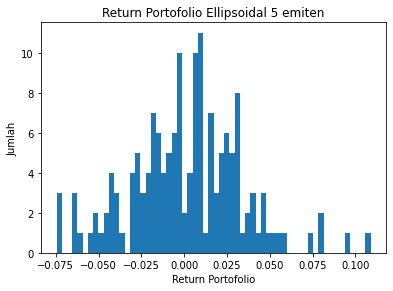

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret51, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio Ellipsoidal 5 emiten")
plt.show(); 

####Sparse Mean-Variance

In [ ]:
ns = R5.shape[1]
m15 = np.ones((n,1), dtype=np.int64)
m15= np.matrix(m15).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      w.T*myu5 == rho, 
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m15.T, (n,)) - R5*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
print("SOC constraint dual variable solution")
print(contraints[0].dual_value)

The optimal value is 0.5007488805758795
Solution for w is
[ 0.35756057  0.31770574  0.09078853 -0.13605557  0.37000073]
SOC constraint dual variable solution
[68.69251345]


In [ ]:
df_pct_ret_test5=df_test5.drop(columns=['Date']).pct_change()
df_pct_ret_test5=df_pct_ret_test5.dropna()
df_pct_ret_test5

,antm,asii,bbri,cpin,pgas
367,0.040462,0.028391,0.010526,0.012539,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.003676
369,0.037037,0.003096,0.019149,0.006250,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,-0.020906
371,0.000000,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
emitens5

['antm', 'asii', 'bbri', 'cpin', 'pgas']

In [ ]:
df_pct_weekly_return5 = pd.DataFrame()
i=0
for emiten in emitens5:
  df_pct_weekly_return5[emiten]=w.value[i]*df_pct_ret_test5[emiten]
  i+=1

df_pct_weekly_return5

,antm,asii,bbri,cpin,pgas
367,0.014468,0.009020,0.000956,-0.001706,-0.001355
368,-0.035756,-0.002924,-0.001891,0.001264,0.001360
369,0.013243,0.000984,0.001739,-0.000850,0.018974
370,-0.017027,-0.000981,0.000000,-0.002958,-0.007735
371,0.000000,0.000984,0.000190,-0.008684,0.002633
...,...,...,...,...,...
518,0.013325,-0.007113,0.000645,0.007394,-0.015136
519,0.000000,0.014551,0.002136,-0.004692,0.008768
520,0.002141,0.001160,0.001252,-0.003527,0.005139
521,0.000000,0.000000,0.000000,0.006876,-0.008448


In [ ]:
price_data5 = df_test5.drop(columns=['Date'])
price_data5

,antm,asii,bbri,cpin,pgas
366,865.0,7925.0,2375.0,3190.0,2730.0
367,900.0,8150.0,2400.0,3230.0,2720.0
368,810.0,8075.0,2350.0,3200.0,2730.0
369,840.0,8100.0,2395.0,3220.0,2870.0
370,800.0,8075.0,2395.0,3290.0,2810.0
...,...,...,...,...,...
518,835.0,6550.0,4250.0,6525.0,2110.0
519,835.0,6850.0,4350.0,6750.0,2160.0
520,840.0,6875.0,4410.0,6925.0,2190.0
521,840.0,6875.0,4410.0,6575.0,2140.0


In [ ]:
ret_data5 = price_data5.pct_change()[1:]
ret_data5

,antm,asii,bbri,cpin,pgas
367,0.040462,0.028391,0.010526,0.012539,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.003676
369,0.037037,0.003096,0.019149,0.006250,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,-0.020906
371,0.000000,0.003096,0.002088,0.063830,0.007117
...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.022831


In [ ]:
weighted_returns5 = (w.value.reshape(5) * ret_data5)
weighted_returns5

,antm,asii,bbri,cpin,pgas
367,0.014468,0.009020,0.000956,-0.001706,-0.001355
368,-0.035756,-0.002924,-0.001891,0.001264,0.001360
369,0.013243,0.000984,0.001739,-0.000850,0.018974
370,-0.017027,-0.000981,0.000000,-0.002958,-0.007735
371,0.000000,0.000984,0.000190,-0.008684,0.002633
...,...,...,...,...,...
518,0.013325,-0.007113,0.000645,0.007394,-0.015136
519,0.000000,0.014551,0.002136,-0.004692,0.008768
520,0.002141,0.001160,0.001252,-0.003527,0.005139
521,0.000000,0.000000,0.000000,0.006876,-0.008448


In [ ]:
port_ret52 = weighted_returns5.sum(axis=1)
port_ret52

367    0.021382
368   -0.037947
369    0.034089
370   -0.028700
371   -0.004878
         ...   
518   -0.000884
519    0.020764
520    0.006164
521   -0.001571
522    0.004661
Length: 156, dtype: float64

In [ ]:
port_ret52.to_csv('port_ret52.csv')
!cp port_ret52.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret52))
print('Min return:', min(port_ret52))
print('Average return:', np.mean(port_ret52))
print('sharpe ratio :', np.mean(port_ret52)/np.std(port_ret52))

Max return: 0.14098911768341105
Min return: -0.08630616254639664
Average return: -9.59336893191833e-05
sharpe ratio : -0.0024648782998157523


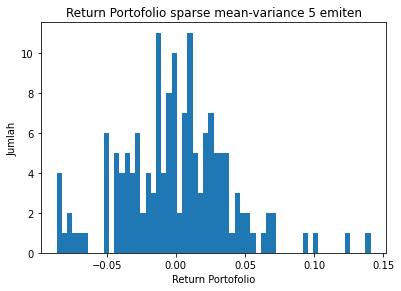

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret52, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio sparse mean-variance 5 emiten")
plt.show(); 

###6 emiten

####Ellipsoidal Uncertainty

In [ ]:
import os
base_dir = '/content/drive/My Drive/PYTHON/saham/data6'

data6 = [f for f in os.listdir(base_dir)]
for f in data6:
    print(f)

ANTM.JK.csv
ASII.JK.csv
BBRI.JK.csv
CPIN.JK.csv
GGRM.JK.csv
PGAS.JK.csv


In [ ]:
#show one emiten
import pandas as pd

example_emiten6 = data6[0]
df_example6 = pd.read_csv(base_dir+'/'+example_emiten6)
print(example_emiten6)
print(df_example6.info())
print("Showing Head of Emiten Dataframe")
df_example6.head()

ANTM.JK.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB
None
Showing Head of Emiten Dataframe


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,1931.949951,1994.949951,1847.949951,1973.949951,1597.762817,163202117
1,2010-01-08,1973.949951,2015.939941,1910.949951,1931.949951,1563.767090,115584733
2,2010-01-15,1868.949951,1952.949951,1784.949951,1826.949951,1478.777588,215405936
3,2010-01-22,1826.949951,1847.949951,1742.949951,1805.949951,1461.779663,147717166
4,2010-01-29,1784.949951,1784.949951,1700.949951,1721.949951,1393.787964,127631493


In [ ]:
df6=pd.DataFrame()
target_column6 = 'Close'
emitens6 = []
for f in data6:
  emiten = f.lower().replace('.jk.csv', '')
  emitens6.append(emiten)
  df_emiten6 = pd.read_csv(base_dir+'/'+f)
  df6['Date'] = df_emiten6['Date']
  df6[emiten] = df_emiten6[target_column6]
df6=df6.dropna()

In [ ]:
df_train6 = df6[(df6['Date'] <= '2017-01-01')]
df_test6 = df6[(df6['Date'] > '2017-01-01')]

print(df_train6)
print(df_test6)

           Date         antm    asii    bbri    cpin     ggrm    pgas
0    2010-01-01  1973.949951  3420.0   765.0   450.0  20900.0  4000.0
1    2010-01-08  1931.949951  3555.0   785.0   455.0  23450.0  3850.0
2    2010-01-15  1826.949951  3525.0   790.0   455.0  24050.0  3750.0
3    2010-01-22  1805.949951  3600.0   765.0   440.0  24050.0  3800.0
4    2010-01-29  1721.949951  3535.0   740.0   440.0  25750.0  3700.0
..          ...          ...     ...     ...     ...      ...     ...
361  2016-12-02   950.000000  7800.0  2300.0  3150.0  67500.0  2840.0
362  2016-12-09   895.000000  7750.0  2280.0  3180.0  66300.0  2800.0
363  2016-12-16   860.000000  7525.0  2175.0  2900.0  60850.0  2480.0
364  2016-12-23   895.000000  8125.0  2330.0  3110.0  64000.0  2760.0
365  2016-12-30   870.000000  8125.0  2420.0  3260.0  65600.0  2860.0

[366 rows x 7 columns]
           Date   antm    asii    bbri    cpin     ggrm    pgas
366  2017-01-06  865.0  7925.0  2375.0  3190.0  63250.0  2730.0
367  201

In [ ]:
emiten_means6 = df6.mean()
emiten_means6

antm     1049.928070
asii     6963.231358
bbri     2210.248566
cpin     3433.757170
ggrm    56963.814532
pgas     3530.869981
dtype: float64

In [ ]:
df_pct_ret6 = df_train6.drop(columns=['Date']).pct_change()
df_pct_ret6 = df_pct_ret6.dropna()
df_pct_ret6.head()

,antm,asii,bbri,cpin,ggrm,pgas
1,-0.021277,0.039474,0.026144,0.011111,0.122010,-0.037500
2,-0.054349,-0.008439,0.006369,0.000000,0.025586,-0.025974
3,-0.011495,0.021277,-0.031646,-0.032967,0.000000,0.013333
4,-0.046513,-0.018056,-0.032680,0.000000,0.070686,-0.026316
5,-0.039025,-0.029703,-0.013514,-0.045455,-0.069903,-0.020270


In [ ]:
import numpy as np
R6=np.array(df_pct_ret6)
print(R6.shape)

(365, 6)


In [ ]:
emiten_pct_ret_means6 = df_pct_ret6.mean()
emiten_pct_ret_means6

antm   -0.000876
asii    0.003320
bbri    0.004238
cpin    0.007500
ggrm    0.004245
pgas    0.000255
dtype: float64

In [ ]:
myu6 = np.matrix(emiten_pct_ret_means6.values).T
myu6

matrix([[-0.00087614],
        [ 0.00331959],
        [ 0.00423764],
        [ 0.00749999],
        [ 0.00424466],
        [ 0.00025489]])

In [ ]:
tho = 0.01
rho= 0.0002;
print(rho)

#jumlah data
n=R6.shape[0]
print(n)

0.0002
365


In [ ]:
import cvxpy as cp
import numpy as np

# Generate a random feasible SOCP.
P = np.array([[0.0001], [0.00009], [0.00008], [0.0001], [0.00009], [0.00008]]).T

ns = R6.shape[1]
m16 = np.ones((n,1), dtype=np.int64)
m16 = np.matrix(m16).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      cp.SOC(w.T @ myu6 - rho, P * w), #first constrraint, SOC constraint
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m16.T, (n,)) - R6*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
#print("SOC constraint dual variable solution")
#print(contraints[0].dual_value)

The optimal value is 0.3740552634702651
Solution for w is
[ 0.17218537  0.2449817   0.1208685  -0.0197182   0.28623693  0.1954457 ]


In [ ]:
print(rho) #rho
print(w.value.T@myu6 - np.linalg.norm(P*w.value)) 
print(w.value.T@myu6 - np.linalg.norm(P*w.value)>= rho) #value of first constraint
(P*w.value)
print(cp.sum(cp.abs(w.value).value).value)

0.0002
[[0.0022492]]
[[ True]]
1.0394363974840692


In [ ]:
df_pct_ret_test6=df_test6.drop(columns=['Date']).pct_change()
df_pct_ret_test6=df_pct_ret_test6.dropna()
df_pct_ret_test6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,0.007117
...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.022831


In [ ]:
emitens6

['antm', 'asii', 'bbri', 'cpin', 'ggrm', 'pgas']

In [ ]:
df_pct_weekly_return6 = pd.DataFrame()
i=0
for emiten in emitens6:
  df_pct_weekly_return6[emiten]=w.value[i]*df_pct_ret_test6[emiten]
  i+=1

df_pct_weekly_return6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.006967,0.006955,0.001272,-0.000247,0.000679,-0.000716
368,-0.017219,-0.002254,-0.002518,0.000183,0.000000,0.000719
369,0.006377,0.000758,0.002315,-0.000123,-0.006321,0.010023
370,-0.008199,-0.000756,0.000000,-0.000429,0.001847,-0.004086
371,0.000000,0.000758,0.000252,-0.001259,-0.006422,0.001391
...,...,...,...,...,...,...
518,0.006417,-0.005485,0.000859,0.001072,-0.005681,-0.007996
519,0.000000,0.011221,0.002844,-0.000680,0.001518,0.004631
520,0.001031,0.000894,0.001667,-0.000511,0.007001,0.002715
521,0.000000,0.000000,0.000000,0.000997,-0.000268,-0.004462


In [ ]:
price_data6 = df_test6.drop(columns=['Date'])
price_data6

,antm,asii,bbri,cpin,ggrm,pgas
366,865.0,7925.0,2375.0,3190.0,63250.0,2730.0
367,900.0,8150.0,2400.0,3230.0,63400.0,2720.0
368,810.0,8075.0,2350.0,3200.0,63400.0,2730.0
369,840.0,8100.0,2395.0,3220.0,62000.0,2870.0
370,800.0,8075.0,2395.0,3290.0,62400.0,2810.0
...,...,...,...,...,...,...
518,835.0,6550.0,4250.0,6525.0,51850.0,2110.0
519,835.0,6850.0,4350.0,6750.0,52125.0,2160.0
520,840.0,6875.0,4410.0,6925.0,53400.0,2190.0
521,840.0,6875.0,4410.0,6575.0,53350.0,2140.0


In [ ]:
ret_data6 = price_data6.pct_change()[1:]
ret_data6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,0.007117
...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.022831


In [ ]:
weighted_returns6 = (w.value.reshape(6) * ret_data6)
weighted_returns6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.006967,0.006955,0.001272,-0.000247,0.000679,-0.000716
368,-0.017219,-0.002254,-0.002518,0.000183,0.000000,0.000719
369,0.006377,0.000758,0.002315,-0.000123,-0.006321,0.010023
370,-0.008199,-0.000756,0.000000,-0.000429,0.001847,-0.004086
371,0.000000,0.000758,0.000252,-0.001259,-0.006422,0.001391
...,...,...,...,...,...,...
518,0.006417,-0.005485,0.000859,0.001072,-0.005681,-0.007996
519,0.000000,0.011221,0.002844,-0.000680,0.001518,0.004631
520,0.001031,0.000894,0.001667,-0.000511,0.007001,0.002715
521,0.000000,0.000000,0.000000,0.000997,-0.000268,-0.004462


In [ ]:
port_ret61 = weighted_returns6.sum(axis=1)
port_ret61

367    0.014910
368   -0.021089
369    0.013029
370   -0.011623
371   -0.005279
         ...   
518   -0.010814
519    0.019534
520    0.012797
521   -0.003734
522    0.009872
Length: 156, dtype: float64

In [ ]:
port_ret61.to_csv('port_ret61.csv')
!cp port_ret61.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret61))
print('Min return:', min(port_ret61))
print('Average return:', np.mean(port_ret61))
print('sharpe ratio :', np.mean(port_ret61)/np.std(port_ret61))


print(np.mean(port_ret61) > rho)

Max return: 0.08425235395953014
Min return: -0.07094646403894866
Average return: 0.0005198167434419514
sharpe ratio : 0.01833375538664384
True


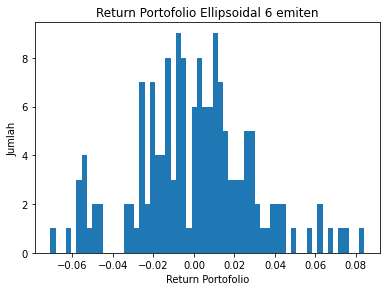

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret61, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio Ellipsoidal 6 emiten")
plt.show(); 

####Sparse mean variance

In [ ]:
ns = R6.shape[1]
m16 = np.ones((n,1), dtype=np.int64)
m16 = np.matrix(m16).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      w.T*myu6 == rho, 
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m16.T, (n,)) - R6*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
print("SOC constraint dual variable solution")
print(contraints[0].dual_value)

The optimal value is 0.4602109538606506
Solution for w is
[ 0.35000156  0.26009454  0.02320055 -0.19218945  0.2115143   0.3473785 ]
SOC constraint dual variable solution
[82.38714137]


In [ ]:
df_pct_ret_test6=df_test6.drop(columns=['Date']).pct_change()
df_pct_ret_test6=df_pct_ret_test6.dropna()
df_pct_ret_test6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,0.007117
...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.022831


In [ ]:
emitens6

['antm', 'asii', 'bbri', 'cpin', 'ggrm', 'pgas']

In [ ]:
df_pct_weekly_return6 = pd.DataFrame()
i=0
for emiten in emitens6:
  df_pct_weekly_return6[emiten]=w.value[i]*df_pct_ret_test6[emiten]
  i+=1

df_pct_weekly_return6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.014162,0.007384,0.000244,-0.002410,0.000502,-0.001272
368,-0.035000,-0.002394,-0.000483,0.001785,0.000000,0.001277
369,0.012963,0.000805,0.000444,-0.001201,-0.004671,0.017814
370,-0.016667,-0.000803,0.000000,-0.004178,0.001365,-0.007262
371,0.000000,0.000805,0.000048,-0.012267,-0.004746,0.002472
...,...,...,...,...,...,...
518,0.013044,-0.005823,0.000165,0.010445,-0.004198,-0.014211
519,0.000000,0.011913,0.000546,-0.006627,0.001122,0.008232
520,0.002096,0.000949,0.000320,-0.004983,0.005174,0.004825
521,0.000000,0.000000,0.000000,0.009714,-0.000198,-0.007931


In [ ]:
price_data6 = df_test6.drop(columns=['Date'])
price_data6

,antm,asii,bbri,cpin,ggrm,pgas
366,865.0,7925.0,2375.0,3190.0,63250.0,2730.0
367,900.0,8150.0,2400.0,3230.0,63400.0,2720.0
368,810.0,8075.0,2350.0,3200.0,63400.0,2730.0
369,840.0,8100.0,2395.0,3220.0,62000.0,2870.0
370,800.0,8075.0,2395.0,3290.0,62400.0,2810.0
...,...,...,...,...,...,...
518,835.0,6550.0,4250.0,6525.0,51850.0,2110.0
519,835.0,6850.0,4350.0,6750.0,52125.0,2160.0
520,840.0,6875.0,4410.0,6925.0,53400.0,2190.0
521,840.0,6875.0,4410.0,6575.0,53350.0,2140.0


In [ ]:
ret_data6 = price_data6.pct_change()[1:]
ret_data6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,0.007117
...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.022831


In [ ]:
weighted_returns6 = (w.value.reshape(6) * ret_data6)
weighted_returns6

,antm,asii,bbri,cpin,ggrm,pgas
367,0.014162,0.007384,0.000244,-0.002410,0.000502,-0.001272
368,-0.035000,-0.002394,-0.000483,0.001785,0.000000,0.001277
369,0.012963,0.000805,0.000444,-0.001201,-0.004671,0.017814
370,-0.016667,-0.000803,0.000000,-0.004178,0.001365,-0.007262
371,0.000000,0.000805,0.000048,-0.012267,-0.004746,0.002472
...,...,...,...,...,...,...
518,0.013044,-0.005823,0.000165,0.010445,-0.004198,-0.014211
519,0.000000,0.011913,0.000546,-0.006627,0.001122,0.008232
520,0.002096,0.000949,0.000320,-0.004983,0.005174,0.004825
521,0.000000,0.000000,0.000000,0.009714,-0.000198,-0.007931


In [ ]:
port_ret62 = weighted_returns6.sum(axis=1)
port_ret62

367    0.018610
368   -0.034815
369    0.026155
370   -0.027545
371   -0.013687
         ...   
518   -0.000579
519    0.015185
520    0.008381
521    0.001584
522    0.003777
Length: 156, dtype: float64

In [ ]:
port_ret62.to_csv('port_ret62.csv')
!cp port_ret62.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret62))
print('Min return:', min(port_ret62))
print('Average return:', np.mean(port_ret62))
print('sharpe ratio :', np.mean(port_ret62)/np.std(port_ret62))

Max return: 0.12956398150266862
Min return: -0.09331210911303096
Average return: -0.0008456175167414729
sharpe ratio : -0.022728043451261115


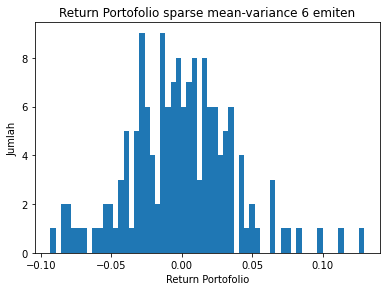

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret62, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio sparse mean-variance 6 emiten")
plt.show(); 

### 7 emiten

####Ellipsoidal Uncertainty 

In [ ]:
import os
base_dir = '/content/drive/My Drive/PYTHON/saham/data7'

data7= [f for f in os.listdir(base_dir)]
for f in data7:
    print(f)

ANTM.JK.csv
ASII.JK.csv
BBRI.JK.csv
CPIN.JK.csv
GGRM.JK.csv
LPPF.JK.csv
PGAS.JK.csv


In [ ]:
#show one emiten
import pandas as pd

example_emiten7 = data7[0]
df_example7 = pd.read_csv(base_dir+'/'+example_emiten7)
print(example_emiten7)
print(df_example7.info())
print("Showing Head of Emiten Dataframe")
df_example7.head()

ANTM.JK.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       523 non-null    object 
 1   Open       523 non-null    float64
 2   High       523 non-null    float64
 3   Low        523 non-null    float64
 4   Close      523 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     523 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.7+ KB
None
Showing Head of Emiten Dataframe


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,1931.949951,1994.949951,1847.949951,1973.949951,1597.762817,163202117
1,2010-01-08,1973.949951,2015.939941,1910.949951,1931.949951,1563.767090,115584733
2,2010-01-15,1868.949951,1952.949951,1784.949951,1826.949951,1478.777588,215405936
3,2010-01-22,1826.949951,1847.949951,1742.949951,1805.949951,1461.779663,147717166
4,2010-01-29,1784.949951,1784.949951,1700.949951,1721.949951,1393.787964,127631493


In [ ]:
df7=pd.DataFrame()
target_column7 = 'Close'
emitens7 = []
for f in data7:
  emiten = f.lower().replace('.jk.csv', '')
  emitens7.append(emiten)
  df_emiten7 = pd.read_csv(base_dir+'/'+f)
  df7['Date'] = df_emiten7['Date']
  df7[emiten] = df_emiten7[target_column7]
df7=df7.dropna()

In [ ]:
df_train7 = df7[(df7['Date'] <= '2017-01-01')]
df_test7 = df7[(df7['Date'] > '2017-01-01')]

print(df_train7)
print(df_test7)

           Date         antm    asii    bbri    cpin     ggrm     lppf    pgas
0    2010-01-01  1973.949951  3420.0   765.0   450.0  20900.0   1000.0  4000.0
1    2010-01-08  1931.949951  3555.0   785.0   455.0  23450.0   1600.0  3850.0
2    2010-01-15  1826.949951  3525.0   790.0   455.0  24050.0   1450.0  3750.0
3    2010-01-22  1805.949951  3600.0   765.0   440.0  24050.0   2725.0  3800.0
4    2010-01-29  1721.949951  3535.0   740.0   440.0  25750.0   2625.0  3700.0
..          ...          ...     ...     ...     ...      ...      ...     ...
361  2016-12-02   950.000000  7800.0  2300.0  3150.0  67500.0  15700.0  2840.0
362  2016-12-09   895.000000  7750.0  2280.0  3180.0  66300.0  14400.0  2800.0
363  2016-12-16   860.000000  7525.0  2175.0  2900.0  60850.0  14450.0  2480.0
364  2016-12-23   895.000000  8125.0  2330.0  3110.0  64000.0  15100.0  2760.0
365  2016-12-30   870.000000  8125.0  2420.0  3260.0  65600.0  15525.0  2860.0

[366 rows x 8 columns]
           Date   antm    as

In [ ]:
emiten_means7 = df7.mean()
emiten_means7

antm     1049.928070
asii     6963.231358
bbri     2210.248566
cpin     3433.757170
ggrm    56963.814532
lppf     9150.487572
pgas     3530.869981
dtype: float64

In [ ]:
df_pct_ret7 = df_train7.drop(columns=['Date']).pct_change()
df_pct_ret7 = df_pct_ret7.dropna()
df_pct_ret7.head()

,antm,asii,bbri,cpin,ggrm,lppf,pgas
1,-0.021277,0.039474,0.026144,0.011111,0.122010,0.600000,-0.037500
2,-0.054349,-0.008439,0.006369,0.000000,0.025586,-0.093750,-0.025974
3,-0.011495,0.021277,-0.031646,-0.032967,0.000000,0.879310,0.013333
4,-0.046513,-0.018056,-0.032680,0.000000,0.070686,-0.036697,-0.026316
5,-0.039025,-0.029703,-0.013514,-0.045455,-0.069903,0.000000,-0.020270


In [ ]:
import numpy as np
R7=np.array(df_pct_ret7)
print(R7.shape)

(365, 7)


In [ ]:
emiten_pct_ret_means7 = df_pct_ret7.mean()
emiten_pct_ret_means7

antm   -0.000876
asii    0.003320
bbri    0.004238
cpin    0.007500
ggrm    0.004245
lppf    0.011310
pgas    0.000255
dtype: float64

In [ ]:
myu7 = np.matrix(emiten_pct_ret_means7.values).T
myu7

matrix([[-0.00087614],
        [ 0.00331959],
        [ 0.00423764],
        [ 0.00749999],
        [ 0.00424466],
        [ 0.01130955],
        [ 0.00025489]])

In [ ]:
tho = 0.6
rho= 0.0002;
print(rho)

#jumlah data
n=R7.shape[0]
print(n)

0.0002
365


In [ ]:
import cvxpy as cp
import numpy as np

# Generate a random feasible SOCP.
P = np.array([[0.0001], [0.00009], [0.00008], [0.0001], [0.00009], [0.00008],[0.0001]]).T

ns = R7.shape[1]
m17 = np.ones((n,1), dtype=np.int64)
m17 = np.matrix(m17).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      cp.SOC(w.T @ myu7 - rho, P * w), #first constrraint, SOC constraint
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m17.T, (n,)) - R7*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
#print("SOC constraint dual variable solution")
#print(contraints[0].dual_value)

The optimal value is 0.9612254671637505
Solution for w is
[1.69443043e-01 2.33058049e-01 1.11985935e-01 4.12944626e-09
 2.73065962e-01 2.75147220e-02 1.84932285e-01]


In [ ]:
print(rho) #rho
print(w.value.T@myu7 - np.linalg.norm(P*w.value)) 
print(w.value.T@myu7 - np.linalg.norm(P*w.value)>= rho) #value of first constraint
(P*w.value)

0.0002
[[0.00257521]]
[[ True]]


array([[1.69443043e-05, 2.09752244e-05, 8.95887477e-06, 4.12944626e-13,
        2.45759366e-05, 2.20117776e-06, 1.84932285e-05]])

In [ ]:
df_pct_ret_test7=df_test7.drop(columns=['Date']).pct_change()
df_pct_ret_test7=df_pct_ret_test7.dropna()
df_pct_ret_test7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.022951,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.013423,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,-0.009934,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,0.025084,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,-0.034258,0.007117
...,...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.008021,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.070081,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.060453,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.021378,-0.022831


In [ ]:
df_pct_ret_test7=df_test7.drop(columns=['Date']).pct_change()
df_pct_ret_test7=df_pct_ret_test7.dropna()
df_pct_ret_test7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.022951,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.013423,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,-0.009934,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,0.025084,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,-0.034258,0.007117
...,...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.008021,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.070081,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.060453,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.021378,-0.022831


In [ ]:
emitens7

['antm', 'asii', 'bbri', 'cpin', 'ggrm', 'lppf', 'pgas']

In [ ]:
df_pct_weekly_return7 = pd.DataFrame()
i=0
for emiten in emitens7:
  df_pct_weekly_return7[emiten]=w.value[i]*df_pct_ret_test7[emiten]
  i+=1

df_pct_weekly_return7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.006856,0.006617,0.001179,5.177989e-11,0.000648,-0.000631,-0.000677
368,-0.016944,-0.002145,-0.002333,-3.835399e-11,0.000000,0.000369,0.000680
369,0.006276,0.000722,0.002144,2.580904e-11,-0.006030,-0.000273,0.009484
370,-0.008069,-0.000719,0.000000,8.977057e-11,0.001762,0.000690,-0.003866
371,0.000000,0.000722,0.000234,2.635817e-10,-0.006126,-0.000943,0.001316
...,...,...,...,...,...,...,...
518,0.006315,-0.005218,0.000796,-2.244264e-10,-0.005420,-0.000221,-0.007565
519,0.000000,0.010674,0.002635,1.423947e-10,0.001448,0.001928,0.004382
520,0.001015,0.000851,0.001545,1.070597e-10,0.006679,0.001663,0.002569
521,0.000000,0.000000,0.000000,-2.087085e-10,-0.000256,-0.000588,-0.004222


In [ ]:
price_data7 = df_test7.drop(columns=['Date'])
price_data7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
366,865.0,7925.0,2375.0,3190.0,63250.0,15250.0,2730.0
367,900.0,8150.0,2400.0,3230.0,63400.0,14900.0,2720.0
368,810.0,8075.0,2350.0,3200.0,63400.0,15100.0,2730.0
369,840.0,8100.0,2395.0,3220.0,62000.0,14950.0,2870.0
370,800.0,8075.0,2395.0,3290.0,62400.0,15325.0,2810.0
...,...,...,...,...,...,...,...
518,835.0,6550.0,4250.0,6525.0,51850.0,3710.0,2110.0
519,835.0,6850.0,4350.0,6750.0,52125.0,3970.0,2160.0
520,840.0,6875.0,4410.0,6925.0,53400.0,4210.0,2190.0
521,840.0,6875.0,4410.0,6575.0,53350.0,4120.0,2140.0


In [ ]:
ret_data7 = price_data7.pct_change()[1:]
ret_data7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.022951,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.013423,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,-0.009934,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,0.025084,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,-0.034258,0.007117
...,...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.008021,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.070081,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.060453,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.021378,-0.022831


In [ ]:
weighted_returns7 = (w.value.reshape(7) * ret_data7)
weighted_returns7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.006856,0.006617,0.001179,5.177989e-11,0.000648,-0.000631,-0.000677
368,-0.016944,-0.002145,-0.002333,-3.835399e-11,0.000000,0.000369,0.000680
369,0.006276,0.000722,0.002144,2.580904e-11,-0.006030,-0.000273,0.009484
370,-0.008069,-0.000719,0.000000,8.977057e-11,0.001762,0.000690,-0.003866
371,0.000000,0.000722,0.000234,2.635817e-10,-0.006126,-0.000943,0.001316
...,...,...,...,...,...,...,...
518,0.006315,-0.005218,0.000796,-2.244264e-10,-0.005420,-0.000221,-0.007565
519,0.000000,0.010674,0.002635,1.423947e-10,0.001448,0.001928,0.004382
520,0.001015,0.000851,0.001545,1.070597e-10,0.006679,0.001663,0.002569
521,0.000000,0.000000,0.000000,-2.087085e-10,-0.000256,-0.000588,-0.004222


In [ ]:
port_ret71 = weighted_returns7.sum(axis=1)
port_ret71

367    0.013990
368   -0.020373
369    0.012322
370   -0.010202
371   -0.004797
         ...   
518   -0.011313
519    0.021068
520    0.014321
521   -0.005066
522    0.009846
Length: 156, dtype: float64

In [ ]:
port_ret71.to_csv('port_ret71.csv')
!cp port_ret71.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret71))
print('Min return:', min(port_ret71))
print('Average return:', np.mean(port_ret71))
print('sharpe ratio :', np.mean(port_ret71)/np.std(port_ret71))


print(np.mean(port_ret71) > rho)

Max return: 0.08300568447413893
Min return: -0.06843692781787718
Average return: 0.0004609764539425368
sharpe ratio : 0.016571244526730592
True


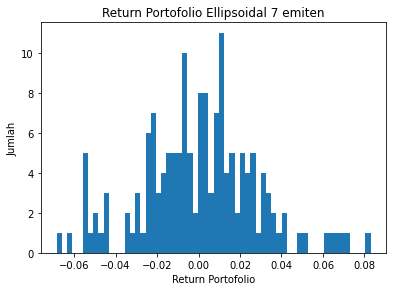

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret71, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio Ellipsoidal 7 emiten")
plt.show(); 

####Sparse mean variance

In [ ]:
ns = R7.shape[1]
m17 = np.ones((n,1), dtype=np.int64)
m17 = np.matrix(m17).T
w0 = np.random.randn(n)


# Define and solve the CVXPY problem.
w = cp.Variable(ns)
contraints = [
      w.T*myu7 == rho, 
      cp.sum(w) == 1,
      
]

obj = cp.Minimize(cp.sum_squares(cp.reshape(rho*m17.T, (n,)) - R7*w) + tho*cp.sum(cp.abs(w)))

prob = cp.Problem(obj,contraints)
prob.solve()

print("The optimal value is", prob.value)
print("Solution for w is")
print(w.value)
print("SOC constraint dual variable solution")
print(contraints[0].dual_value)

The optimal value is 1.1293551649716658
Solution for w is
[ 4.50047308e-01  7.55860168e-02 -6.53504249e-22 -3.30424496e-21
  5.57631921e-02 -6.76228845e-21  4.18603484e-01]
SOC constraint dual variable solution
[160.56546625]


In [ ]:
df_pct_ret_test7=df_test7.drop(columns=['Date']).pct_change()
df_pct_ret_test7=df_pct_ret_test7.dropna()
df_pct_ret_test7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.022951,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.013423,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,-0.009934,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,0.025084,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,-0.034258,0.007117
...,...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.008021,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.070081,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.060453,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.021378,-0.022831


In [ ]:
emitens7

['antm', 'asii', 'bbri', 'cpin', 'ggrm', 'lppf', 'pgas']

In [ ]:
df_pct_weekly_return7 = pd.DataFrame()
i=0
for emiten in emitens7:
  df_pct_weekly_return7[emiten]=w.value[i]*df_pct_ret_test7[emiten]
  i+=1

df_pct_weekly_return7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.018210,0.002146,-6.878992e-24,-4.143254e-23,0.000132,1.552001e-22,-0.001533
368,-0.045005,-0.000696,1.361467e-23,3.068958e-23,0.000000,-9.076897e-23,0.001539
369,0.016668,0.000234,-1.251391e-23,-2.065153e-23,-0.001231,6.717505e-23,0.021467
370,-0.021431,-0.000233,-0.000000e+00,-7.183141e-23,0.000360,-1.696226e-22,-0.008751
371,0.000000,0.000234,-1.364309e-24,-2.109093e-22,-0.001251,2.316608e-22,0.002979
...,...,...,...,...,...,...,...
518,0.016772,-0.001692,-4.645765e-24,1.795785e-22,-0.001107,5.424296e-23,-0.017125
519,0.000000,0.003462,-1.537657e-23,-1.139395e-22,0.000296,-4.739070e-22,0.009920
520,0.002695,0.000276,-9.013852e-24,-8.566561e-23,0.001364,-4.088033e-22,0.005814
521,0.000000,0.000000,-0.000000e+00,1.670016e-22,-0.000052,1.445620e-22,-0.009557


In [ ]:
price_data7 = df_test7.drop(columns=['Date'])
price_data7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
366,865.0,7925.0,2375.0,3190.0,63250.0,15250.0,2730.0
367,900.0,8150.0,2400.0,3230.0,63400.0,14900.0,2720.0
368,810.0,8075.0,2350.0,3200.0,63400.0,15100.0,2730.0
369,840.0,8100.0,2395.0,3220.0,62000.0,14950.0,2870.0
370,800.0,8075.0,2395.0,3290.0,62400.0,15325.0,2810.0
...,...,...,...,...,...,...,...
518,835.0,6550.0,4250.0,6525.0,51850.0,3710.0,2110.0
519,835.0,6850.0,4350.0,6750.0,52125.0,3970.0,2160.0
520,840.0,6875.0,4410.0,6925.0,53400.0,4210.0,2190.0
521,840.0,6875.0,4410.0,6575.0,53350.0,4120.0,2140.0


In [ ]:
ret_data7 = price_data7.pct_change()[1:]
ret_data7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.040462,0.028391,0.010526,0.012539,0.002372,-0.022951,-0.003663
368,-0.100000,-0.009202,-0.020833,-0.009288,0.000000,0.013423,0.003676
369,0.037037,0.003096,0.019149,0.006250,-0.022082,-0.009934,0.051282
370,-0.047619,-0.003086,0.000000,0.021739,0.006452,0.025084,-0.020906
371,0.000000,0.003096,0.002088,0.063830,-0.022436,-0.034258,0.007117
...,...,...,...,...,...,...,...
518,0.037267,-0.022388,0.007109,-0.054348,-0.019849,-0.008021,-0.040909
519,0.000000,0.045802,0.023529,0.034483,0.005304,0.070081,0.023697
520,0.005988,0.003650,0.013793,0.025926,0.024460,0.060453,0.013889
521,0.000000,0.000000,0.000000,-0.050542,-0.000936,-0.021378,-0.022831


In [ ]:
weighted_returns7 = (w.value.reshape(7) * ret_data7)
weighted_returns7

,antm,asii,bbri,cpin,ggrm,lppf,pgas
367,0.018210,0.002146,-6.878992e-24,-4.143254e-23,0.000132,1.552001e-22,-0.001533
368,-0.045005,-0.000696,1.361467e-23,3.068958e-23,0.000000,-9.076897e-23,0.001539
369,0.016668,0.000234,-1.251391e-23,-2.065153e-23,-0.001231,6.717505e-23,0.021467
370,-0.021431,-0.000233,-0.000000e+00,-7.183141e-23,0.000360,-1.696226e-22,-0.008751
371,0.000000,0.000234,-1.364309e-24,-2.109093e-22,-0.001251,2.316608e-22,0.002979
...,...,...,...,...,...,...,...
518,0.016772,-0.001692,-4.645765e-24,1.795785e-22,-0.001107,5.424296e-23,-0.017125
519,0.000000,0.003462,-1.537657e-23,-1.139395e-22,0.000296,-4.739070e-22,0.009920
520,0.002695,0.000276,-9.013852e-24,-8.566561e-23,0.001364,-4.088033e-22,0.005814
521,0.000000,0.000000,-0.000000e+00,1.670016e-22,-0.000052,1.445620e-22,-0.009557


In [ ]:
port_ret72 = weighted_returns7.sum(axis=1)
port_ret72

367    0.018955
368   -0.044161
369    0.037138
370   -0.030056
371    0.001962
         ...   
518   -0.003152
519    0.013677
520    0.010149
521   -0.009609
522    0.010878
Length: 156, dtype: float64

In [ ]:
port_ret72.to_csv('port_ret72.csv')
!cp port_ret72.csv "/content/drive/My Drive/PYTHON/port_ret"

In [ ]:
print('Max return:', max(port_ret72))
print('Min return:', min(port_ret72))
print('Average return:', np.mean(port_ret72))
print('sharpe ratio :', np.mean(port_ret72)/np.std(port_ret72))

Max return: 0.15628315880092103
Min return: -0.0933975912083587
Average return: 0.00061006045745565
sharpe ratio : 0.014213540068424329


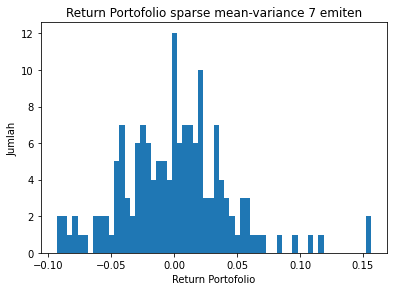

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret72, bins = 60)
ax1.set_xlabel('Return Portofolio')
ax1.set_ylabel("Jumlah")
ax1.set_title("Return Portofolio sparse mean-variance 7 emiten")
plt.show();